In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/fake-and-real-news-dataset/True.csv
/kaggle/input/fake-and-real-news-dataset/Fake.csv


In [2]:
import pandas as pd
import numpy as np

In [3]:
true = pd.read_csv('../input/fake-and-real-news-dataset/True.csv')
fake = pd.read_csv('../input/fake-and-real-news-dataset/Fake.csv')
true.head()

,title,text,subject,date
0,"As U.S. budget fight looms, Republicans flip t...",WASHINGTON (Reuters) - The head of a conservat...,politicsNews,"December 31, 2017"
1,U.S. military to accept transgender recruits o...,WASHINGTON (Reuters) - Transgender people will...,politicsNews,"December 29, 2017"
2,Senior U.S. Republican senator: 'Let Mr. Muell...,WASHINGTON (Reuters) - The special counsel inv...,politicsNews,"December 31, 2017"
3,FBI Russia probe helped by Australian diplomat...,WASHINGTON (Reuters) - Trump campaign adviser ...,politicsNews,"December 30, 2017"
4,Trump wants Postal Service to charge 'much mor...,SEATTLE/WASHINGTON (Reuters) - President Donal...,politicsNews,"December 29, 2017"


In [4]:
fake['target'] = 0
true['target'] = 1
df = pd.concat([fake, true]).reset_index(drop = True)
from sklearn.utils import shuffle
df = shuffle(df)

In [7]:
new_df= df[20000:]
new_df.shape

(24898, 5)

In [8]:
y = new_df['target']
x = new_df.drop('target', axis=1)

In [9]:
new_df.shape

(24898, 5)

In [10]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer,HashingVectorizer

In [12]:
new_df = new_df.dropna()
news = new_df.copy()

In [14]:
news.reset_index(inplace=True)

In [15]:
news['text'][2]
len(news)

24898

In [16]:
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
import re 
ps = PorterStemmer()
corpus = []
for i in range(0, len(news)):
    review =re.sub('[^a-zA-Z]',' ',news['text'][i])
    review = review.lower()
    review = review.split()
    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [17]:
corpus[1]

'beirut reuter u back syrian militia let govern forc cross euphrat river bid recov eastern syria command said friday russia said armi unit alreadi done near citi deir al zor aid presid bashar al assad meanwhil said govern would fight forc includ u back militia effort recaptur rest countri syrian govern forc support russian air strike iran back militia u back allianc kurdish arab fighter converg islam state separ offens around deir al zor govern side advanc citi west last week broke islam state sieg provinci capit sit western bank river deir al zor militari council fight part u back syrian democrat forc sdf meanwhil advanc toward deir al zor eastern side river sinc launch offens provinc week ago militari council command ahm abu khawla warn govern forc militia alli fire across river fighter close someth said happen recent day km us eastern riverbank forc reach area shot fire area consid attack militari council said notifi regim russia come euphrat riverbank see forc advanc said allow reg

In [18]:
## TFidf Vectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf_v=TfidfVectorizer(max_features=5000,ngram_range=(1,3))
X=tfidf_v.fit_transform(corpus).toarray()

In [19]:
X.shape

(24898, 5000)

In [20]:
y = news['target']

In [21]:
## Divide the dataset into Train and Test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=0)

In [23]:
tfidf_v.get_feature_names()[:10]

['abadi',
 'abandon',
 'abba',
 'abc',
 'abc news',
 'abdullah',
 'abe',
 'abedin',
 'abid',
 'abil']

In [24]:
tfidf_v.get_params()

{'analyzer': 'word',
 'binary': False,
 'decode_error': 'strict',
 'dtype': numpy.float64,
 'encoding': 'utf-8',
 'input': 'content',
 'lowercase': True,
 'max_df': 1.0,
 'max_features': 5000,
 'min_df': 1,
 'ngram_range': (1, 3),
 'norm': 'l2',
 'preprocessor': None,
 'smooth_idf': True,
 'stop_words': None,
 'strip_accents': None,
 'sublinear_tf': False,
 'token_pattern': '(?u)\\b\\w\\w+\\b',
 'tokenizer': None,
 'use_idf': True,
 'vocabulary': None}

In [25]:
count_df = pd.DataFrame(X_train,columns=tfidf_v.get_feature_names())
count_df.head(4)

,abadi,abandon,abba,abc,abc news,abdullah,abe,abedin,abid,abil,...,youtub,youtub com,youtub com watch,zealand,zero,zika,zimbabw,zone,zor,zuma
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.000000,0.0,0.0,0.0,0.0,0.0,0.169279,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.038211,0.0,0.0,0.0,0.0,0.0,0.000000,0.0,0.0,0.0


In [26]:
import matplotlib.pyplot as plt

In [27]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    See full source and example: 
    http://scikit-learn.org/stable/auto_examples/model_selection/plot_confusion_matrix.html
    
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

**MultinomialNB Algorithm**

In [28]:
from sklearn import metrics
import numpy as np
import itertools
from sklearn.naive_bayes import MultinomialNB
classifier=MultinomialNB()

In [29]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)

accuracy:   0.945


Confusion matrix, without normalization


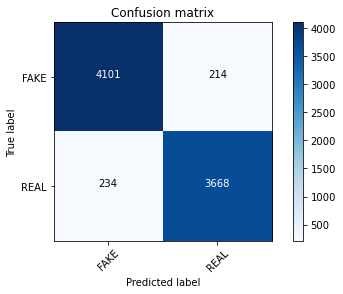

In [30]:
plot_confusion_matrix(cm,classes=['FAKE', 'REAL'])

In [31]:
classifier.fit(X_train, y_train)
pred = classifier.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
score

0.9454788852379213

**Passive Aggressive Classifier Algorithm**

In [32]:
from sklearn.linear_model import PassiveAggressiveClassifier
linear_clf = PassiveAggressiveClassifier(max_iter=50)

In [ ]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)

accuracy:   0.992
Confusion matrix, without normalization


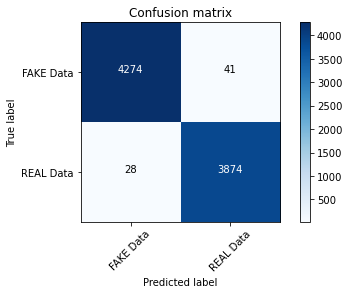

In [33]:
linear_clf.fit(X_train, y_train)
pred = linear_clf.predict(X_test)
score = metrics.accuracy_score(y_test, pred)
print("accuracy:   %0.3f" % score)
cm = metrics.confusion_matrix(y_test, pred)
plot_confusion_matrix(cm, classes=['FAKE Data', 'REAL Data'])

**Multinomial Classifier with Hyperparameter**

In [34]:
classifier=MultinomialNB(alpha=0.1)

In [35]:
previous_score=0
for alpha in np.arange(0,1,0.1):
    sub_classifier=MultinomialNB(alpha=alpha)
    sub_classifier.fit(X_train,y_train)
    y_pred=sub_classifier.predict(X_test)
    score = metrics.accuracy_score(y_test, y_pred)
    if score>previous_score:
        classifier=sub_classifier
    print("Alpha: {}, Score : {}".format(alpha,score))

/opt/conda/lib/python3.7/site-packages/sklearn/naive_bayes.py:507: UserWarning: alpha too small will result in numeric errors, setting alpha = 1.0e-10
  'setting alpha = %.1e' % _ALPHA_MIN)


Alpha: 0.0, Score : 0.9632469271023488
Alpha: 0.1, Score : 0.949008153827431
Alpha: 0.2, Score : 0.9474260679079957
Alpha: 0.30000000000000004, Score : 0.9468175733235974
Alpha: 0.4, Score : 0.9464524765729585
Alpha: 0.5, Score : 0.94596568090544
Alpha: 0.6000000000000001, Score : 0.9457222830716807
Alpha: 0.7000000000000001, Score : 0.9454788852379213
Alpha: 0.8, Score : 0.945600584154801
Alpha: 0.9, Score : 0.945600584154801


In [40]:
## Get Features names
feature_names = tfidf_v.get_feature_names()

In [36]:
classifier.coef_[0]

array([-8.70209818, -8.97535592, -8.83881622, ..., -8.22018359,
       -9.0146064 , -8.3112067 ])

In [41]:
### Most real
sorted(zip(classifier.coef_[0], feature_names), reverse=True)[:20]

[(-4.951973585092821, 'said'),
 (-5.3744964969609486, 'trump'),
 (-5.655527086556175, 'reuter'),
 (-5.704361542853394, 'state'),
 (-5.8541756927584165, 'presid'),
 (-5.915002500336394, 'would'),
 (-5.994262262877142, 'govern'),
 (-6.002676944136278, 'republican'),
 (-6.096728362943274, 'senat'),
 (-6.112623456701055, 'hous'),
 (-6.135344703147997, 'elect'),
 (-6.163533057011727, 'year'),
 (-6.2042339827235775, 'parti'),
 (-6.225155645234377, 'unit'),
 (-6.243728162821662, 'washington'),
 (-6.268375027324647, 'democrat'),
 (-6.2688112738374935, 'minist'),
 (-6.285536712913281, 'offici'),
 (-6.323717289609356, 'new'),
 (-6.346955031773704, 'told')]

In [42]:
### Most fake
sorted(zip(classifier.coef_[0], feature_names))[:5000]

[(-11.354787745137275, 'alex wong'),
 (-11.354787745137275, 'amp'),
 (-11.354787745137275, 'amp amp'),
 (-11.354787745137275, 'antifa'),
 (-11.354787745137275, 'becom member wire'),
 (-11.354787745137275, 'boiler room'),
 (-11.354787745137275, 'cdata'),
 (-11.354787745137275, 'centuri wire'),
 (-11.354787745137275, 'centuri wire say'),
 (-11.354787745137275, 'chip somodevilla'),
 (-11.354787745137275, 'chip somodevilla getti'),
 (-11.354787745137275, 'com watch'),
 (-11.354787745137275, 'entir stori'),
 (-11.354787745137275, 'featur imag screenshot'),
 (-11.354787745137275, 'featur imag via'),
 (-11.354787745137275, 'filessupport'),
 (-11.354787745137275, 'filessupport wire'),
 (-11.354787745137275, 'flickr'),
 (-11.354787745137275, 'gateway pundit'),
 (-11.354787745137275, 'getti imag'),
 (-11.354787745137275, 'henningsen'),
 (-11.354787745137275, 'http'),
 (-11.354787745137275, 'http co'),
 (-11.354787745137275, 'http twitter'),
 (-11.354787745137275, 'http twitter com'),
 (-11.35478